## Библиотека `pandas`

### Задание 1

* Загрузить массив `NumPy` из файла `"arr_pandas.npy"` и преобразовать его в датафрейм. 
* Массив содержит данные по результатам соревнований Scottish Hill Races в 2000 году (полное описание на английском языке можно посмотреть на [странице](https://vincentarelbundock.github.io/Rdatasets/doc/DAAG/races2000.html) с документацией по исходному файлу с данными).

In [105]:
# Импортируем все необходимые библиотеки и настроим ноутбук:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os

%matplotlib inline
warnings.filterwarnings("ignore")

In [106]:
arr = np.load("arr_pandas.npy", allow_pickle=True) 
dat = pd.DataFrame(arr)
dat

,0,1,2,3,4,5
0,Aonach Mor Gondola,2.0,2000,0.403611,0.518889,uphill
1,Broughton Brewery,2.0,650,0.254444,0.316667,other
2,El-Brim-Ick,3.0,750,0.485833,0.389167,other
3,The Devils Burdens,21.0,4100,2.399722,3.093333,relay
4,Tiso Carnethy,6.0,2500,0.782222,0.919167,hill
...,...,...,...,...,...,...
72,Tinto,4.5,1500,0.499444,0.581111,hill
73,Druim Fada,6.5,1000,0.751111,0.972222,other
74,Elrick,3.6,650,0.358056,0.4425,relay
75,Gondola,2.5,2000,0.387222,0.518889,uphill


### Задание 2

* Определить, сколько в датафрейме строк и столбцов. 
* Привести код и указать ответ в виде текста или комментария к коду.

In [107]:
dat.shape 

# 77 строк и 6 столбцов

(77, 6)

### Задание 3

Присвоить столбцам следующие названия (указаны с пояснениями): 

* `id`: id участника
* `dist`: расстояние в милях (по карте)
* `climb`: высота, достигнутая на маршруте (в сумме за весь маршрут, в футах)
* `time`: время (в часах)
* `timef`: время для женщин (в часах)
* `type`: тип гонки (*hill*, *marathon*, *relay*, *uphill* or *other*)

In [108]:
dat.columns = ['id', 'dist', 'climb', 'time', 'timef', 'type']
print(dat.to_string()) # выводит массив полностью (чтобы проверить высоту Norman's Law и др.)

                       id  dist climb       time      timef      type
0      Aonach Mor Gondola   2.0  2000   0.403611   0.518889    uphill
1       Broughton Brewery   2.0   650   0.254444   0.316667     other
2             El-Brim-Ick   3.0   750   0.485833   0.389167     other
3      The Devils Burdens  21.0  4100   2.399722   3.093333     relay
4           Tiso Carnethy   6.0  2500   0.782222   0.919167      hill
5                 Criffel   7.0  1800   0.793333   1.003333      hill
6              Chapelgill   1.5  1400   0.314444   0.376667      hill
7            Norman's Law   5.0   700   0.464167   0.609167      hill
8            Craig Dunain   6.0   900   0.546111   0.625833      hill
9             Knockfarrel   5.0  1200   0.623333   0.734167      hill
10                 Screel   4.0  1300   0.458889   0.543611      hill
11      O.P.S. Clachnaben  10.5  3500   1.278889   1.487778      hill
12            Hunters Bog   4.5   800   0.409444   0.477778     other
13         Aberfoyle

### Задание 4

Вывести на экран значение высоты, достигнутой на маршруте участником *Norman's Law*.

In [109]:
dat.index = dat.id
dat.loc["Norman's Law", "climb"]

700

### Задание 5
Вывести на экран значения показателей `dist`, `climb` , `time` для первых 10 участников.

In [110]:
dat.loc['Aonach Mor Gondola':'Knockfarrel', ['dist', 'climb', 'time']]

,dist,climb,time
id,,,
Aonach Mor Gondola,2.0,2000,0.403611
Broughton Brewery,2.0,650,0.254444
El-Brim-Ick,3.0,750,0.485833
The Devils Burdens,21.0,4100,2.399722
Tiso Carnethy,6.0,2500,0.782222
Criffel,7.0,1800,0.793333
Chapelgill,1.5,1400,0.314444
Norman's Law,5.0,700,0.464167
Craig Dunain,6.0,900,0.546111


### Задание 6

* Вывести на экран сводную информацию по датафрейму, которая включает типы всех столбцов. 
* Сколько столбцов типа `float` в датафрейме? 
* Привести ответ на вопрос в виде текста или комментария к коду.

In [111]:
dat.info() 

# все столбцы типа object, так как данные мы сначала загружали не в датафрейм,
# а в массив numpy, а в массиве numpy могут быть только данные одного типа

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, Aonach Mor Gondola to Greenmantle
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      77 non-null     object
 1   dist    77 non-null     object
 2   climb   77 non-null     object
 3   time    77 non-null     object
 4   timef   75 non-null     object
 5   type    77 non-null     object
dtypes: object(6)
memory usage: 6.3+ KB


### Задание 7

Выбрать строки, которые соответствуют участникам эстафеты (*relay*).

In [112]:
dat[dat['type'] == 'relay']

,id,dist,climb,time,timef,type
id,,,,,,
The Devils Burdens,The Devils Burdens,21.0,4100,2.399722,3.093333,relay
Ben Rha,Ben Rha,7.5,800,0.738056,0.997222,relay
Elrick,Elrick,3.6,650,0.358056,0.4425,relay


### Задание 8

* Выбрать строки, которые соответствуют участникам гонки в холмах (*hill*), которые в сумме достигли высоты более 1000 футов. 
* Посчитать, сколько таких участников.

In [113]:
dat_hill = dat[(dat['type'] == 'hill') & (dat['climb'] > 1000)]
dat_hill.shape[0]  # 39 участников

39

### Задание 9

Выбрать строки, соответствующие участникам, которые либо достигли высоты более 4000 футов, либо потратили менее 0.5 часов.

In [114]:
dat[(dat['climb'] > 4000) | (dat['time'] < 0.5)]

,id,dist,climb,time,timef,type
id,,,,,,
Aonach Mor Gondola,Aonach Mor Gondola,2.0,2000,0.403611,0.518889,uphill
Broughton Brewery,Broughton Brewery,2.0,650,0.254444,0.316667,other
El-Brim-Ick,El-Brim-Ick,3.0,750,0.485833,0.389167,other
The Devils Burdens,The Devils Burdens,21.0,4100,2.399722,3.093333,relay
Chapelgill,Chapelgill,1.5,1400,0.314444,0.376667,hill
Norman's Law,Norman's Law,5.0,700,0.464167,0.609167,hill
Screel,Screel,4.0,1300,0.458889,0.543611,hill
Hunters Bog,Hunters Bog,4.5,800,0.409444,0.477778,other
Aberfoyle Dash,Aberfoyle Dash,3.0,1000,0.3375,0.381389,uphill


### Задание 10

Создать столбец `time_min`, который содержит время маршрута, измеренное в минутах.

In [115]:
dat['time_min'] = dat['time'] * 60
dat.head()

,id,dist,climb,time,timef,type,time_min
id,,,,,,,
Aonach Mor Gondola,Aonach Mor Gondola,2.0,2000,0.403611,0.518889,uphill,24.216667
Broughton Brewery,Broughton Brewery,2.0,650,0.254444,0.316667,other,15.266667
El-Brim-Ick,El-Brim-Ick,3.0,750,0.485833,0.389167,other,29.15
The Devils Burdens,The Devils Burdens,21.0,4100,2.399722,3.093333,relay,143.983333
Tiso Carnethy,Tiso Carnethy,6.0,2500,0.782222,0.919167,hill,46.933333


### Задание 11

* Создать столбец `year` с годом соревнований (везде 2000 год). 
* Внимание: столбец с годом должен быть числовым (целочисленным).

In [116]:
dat['year'] = 2000
dat.head()

,id,dist,climb,time,timef,type,time_min,year
id,,,,,,,,
Aonach Mor Gondola,Aonach Mor Gondola,2.0,2000,0.403611,0.518889,uphill,24.216667,2000
Broughton Brewery,Broughton Brewery,2.0,650,0.254444,0.316667,other,15.266667,2000
El-Brim-Ick,El-Brim-Ick,3.0,750,0.485833,0.389167,other,29.15,2000
The Devils Burdens,The Devils Burdens,21.0,4100,2.399722,3.093333,relay,143.983333,2000
Tiso Carnethy,Tiso Carnethy,6.0,2500,0.782222,0.919167,hill,46.933333,2000


In [117]:
# проверяем, что столбец year - целочисленный:

dat.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, Aonach Mor Gondola to Greenmantle
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        77 non-null     object
 1   dist      77 non-null     object
 2   climb     77 non-null     object
 3   time      77 non-null     object
 4   timef     75 non-null     object
 5   type      77 non-null     object
 6   time_min  77 non-null     object
 7   year      77 non-null     int64 
dtypes: int64(1), object(7)
memory usage: 7.5+ KB


### Задание 12

* Загрузить датафрейм из файла `extraversion.csv`, содержащий результаты учебного психометрического исследования, целью которого является выявление связи между уровнем экстраверсии человека и его склонности к участию в волонтёрской деятельности. 

Датафрейм содержит следующие столбцы:

* `sex`: пол респондента (Женский, Мужской);
* `volunteer`: регулярное участие в волонтёрской деятельности (Да, Нет);
* `Q 1` - `Q 57`: ответы на вопросы по анкете Айзенка (Да, Нет)

Информацию об анкете и сами вопросы можно найти на [этой](http://ipp.hse.ru/57-testytest-ajzenka-ekstraversiya-introversiya-nejrotizm) странице.

In [118]:
ps = pd.read_csv("extraversion.csv", encoding = "UTF-8") # кодировка UTF-8, чтобы кириллица корректно считывалась на Windows
ps.head()

,Unnamed: 0,Unnamed: 0.1,sex,volunteer,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,...,Q 48,Q 49,Q 50,Q 51,Q 52,Q 53,Q 54,Q 55,Q 56,Q 57
0,0,1,Женский,Нет,Да,Нет,Нет,Да,Да,Да,...,Да,Нет,Нет,Да,Да,Нет,Нет,Нет,Нет,Да
1,1,2,Женский,Да,Да,Да,Нет,Да,Да,Да,...,Да,Да,Нет,Нет,Нет,Да,Нет,Да,Да,Нет
2,2,3,Женский,Да,Да,Да,Нет,Нет,Да,Да,...,Да,Да,Нет,Нет,Да,Нет,Нет,Да,Да,Нет
3,3,4,Женский,Нет,Да,Да,Нет,Нет,Да,Да,...,Да,Нет,Да,Да,Нет,Нет,Нет,Да,Нет,Нет
4,4,5,Женский,Нет,Да,Да,Нет,Да,Да,Да,...,Да,Да,Нет,Нет,Да,Да,Да,Да,Да,Нет


### Задание 13

* Определить, сколько в датафрейме строк и столбцов. 
* Привести код и указать ответ в виде текста или комментария к коду.

In [119]:
ps.shape[0] 

# кол-во строк 52

52

In [120]:
ps.shape[1] 

# кол-во столбцов 61

61

### Задание 14

Переименовать столбцы `Q 1`-`Q 57` в `Q1`-`Q57`, другими словами, убрать в названиях всех столбцов пробелы в середине (если есть). 

In [121]:
# 1-й вариант:

ps.columns = ps.columns.str.replace(' ', '') 
ps.head()

,Unnamed:0,Unnamed:0.1,sex,volunteer,Q1,Q2,Q3,Q4,Q5,Q6,...,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57
0,0,1,Женский,Нет,Да,Нет,Нет,Да,Да,Да,...,Да,Нет,Нет,Да,Да,Нет,Нет,Нет,Нет,Да
1,1,2,Женский,Да,Да,Да,Нет,Да,Да,Да,...,Да,Да,Нет,Нет,Нет,Да,Нет,Да,Да,Нет
2,2,3,Женский,Да,Да,Да,Нет,Нет,Да,Да,...,Да,Да,Нет,Нет,Да,Нет,Нет,Да,Да,Нет
3,3,4,Женский,Нет,Да,Да,Нет,Нет,Да,Да,...,Да,Нет,Да,Да,Нет,Нет,Нет,Да,Нет,Нет
4,4,5,Женский,Нет,Да,Да,Нет,Да,Да,Да,...,Да,Да,Нет,Нет,Да,Да,Да,Да,Да,Нет


In [122]:
# 2-й вариант:

list(ps.columns)
ps.columns = [i.replace(' ', '') for i in list(ps.columns)] 
ps.head()

,Unnamed:0,Unnamed:0.1,sex,volunteer,Q1,Q2,Q3,Q4,Q5,Q6,...,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57
0,0,1,Женский,Нет,Да,Нет,Нет,Да,Да,Да,...,Да,Нет,Нет,Да,Да,Нет,Нет,Нет,Нет,Да
1,1,2,Женский,Да,Да,Да,Нет,Да,Да,Да,...,Да,Да,Нет,Нет,Нет,Да,Нет,Да,Да,Нет
2,2,3,Женский,Да,Да,Да,Нет,Нет,Да,Да,...,Да,Да,Нет,Нет,Да,Нет,Нет,Да,Да,Нет
3,3,4,Женский,Нет,Да,Да,Нет,Нет,Да,Да,...,Да,Нет,Да,Да,Нет,Нет,Нет,Да,Нет,Нет
4,4,5,Женский,Нет,Да,Да,Нет,Да,Да,Да,...,Да,Да,Нет,Нет,Да,Да,Да,Да,Да,Нет


In [123]:
# 3-й вариант:

list(ps.columns)

def my_function(x):
    """
    Функция, меняющая пробелы на «пустоту».
    
    """
    return x.replace(' ', '')

ps.columns = list(map(my_function, ps.columns))
ps.head()

,Unnamed:0,Unnamed:0.1,sex,volunteer,Q1,Q2,Q3,Q4,Q5,Q6,...,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57
0,0,1,Женский,Нет,Да,Нет,Нет,Да,Да,Да,...,Да,Нет,Нет,Да,Да,Нет,Нет,Нет,Нет,Да
1,1,2,Женский,Да,Да,Да,Нет,Да,Да,Да,...,Да,Да,Нет,Нет,Нет,Да,Нет,Да,Да,Нет
2,2,3,Женский,Да,Да,Да,Нет,Нет,Да,Да,...,Да,Да,Нет,Нет,Да,Нет,Нет,Да,Да,Нет
3,3,4,Женский,Нет,Да,Да,Нет,Нет,Да,Да,...,Да,Нет,Да,Да,Нет,Нет,Нет,Да,Нет,Нет
4,4,5,Женский,Нет,Да,Да,Нет,Да,Да,Да,...,Да,Да,Нет,Нет,Да,Да,Да,Да,Да,Нет


### Задание 15

* Выбрать столбцы `Q1`, `Q3`, `Q8`, `Q10`, `Q13`, `Q17`, `Q22`, `Q25`, `Q27`, `Q39`, `Q44`, `Q46`, `Q49`, `Q53`, `Q56` и сохранить их в отдельный датафрейм `extra_yes`. 
* Выбрать столбцы `Q5`, `Q15`, `Q20`, `Q29`, `Q32`, `Q34`, `Q37`,`Q41`, `Q51` и сохранить их в отдельный датафрейм `extra_no`.
* Эти столбцы будут использоваться для вычисления индекса экстраверсии.

In [124]:
extra_yes = ps[['Q1', 'Q3', 'Q8', 'Q10', 'Q13', 'Q17', 'Q22', 'Q25', 'Q27', 'Q39', 'Q44', 'Q46', 'Q49', 'Q53', 'Q56']]
extra_yes.head()

,Q1,Q3,Q8,Q10,Q13,Q17,Q22,Q25,Q27,Q39,Q44,Q46,Q49,Q53,Q56
0,Да,Нет,Нет,Нет,Да,Нет,Нет,Нет,Да,Нет,Нет,Нет,Нет,Нет,Нет
1,Да,Нет,Да,Да,Нет,Да,Нет,Да,Да,Да,Нет,Нет,Да,Да,Да
2,Да,Нет,Нет,Нет,Нет,Да,Нет,Да,Да,Да,Да,Нет,Да,Нет,Да
3,Да,Нет,Нет,Нет,Нет,Да,Нет,Нет,Нет,Нет,Нет,Нет,Нет,Нет,Нет
4,Да,Нет,Нет,Нет,Да,Да,Нет,Да,Да,Нет,Нет,Да,Да,Да,Да


In [125]:
extra_no = ps[['Q5', 'Q15', 'Q20', 'Q29', 'Q32', 'Q34', 'Q37', 'Q41', 'Q51']]
extra_no.head()

,Q5,Q15,Q20,Q29,Q32,Q34,Q37,Q41,Q51
0,Да,Да,Да,Да,Да,Нет,Да,Нет,Да
1,Да,Нет,Да,Нет,Нет,Да,Нет,Нет,Нет
2,Да,Да,Да,Нет,Нет,Да,Нет,Нет,Нет
3,Да,Нет,Да,Да,Да,Да,Да,Нет,Да
4,Да,Нет,Да,Нет,Да,Да,Да,Нет,Нет


### Задание 16

* Посчитать для каждой строки в датафрейме `extra_yes` число ответов `"Да"` и полученный результат сохранить в переменную `extra_yes_sum`. 
* Посчитать для каждой строки в датафрейме `extra_no` число ответов `"Нет"` и полученный результат сохранить в переменную `extra_no_sum`.

In [126]:
extra_yes_sum = extra_yes.isin(['Да']).sum(axis = 1)
extra_yes_sum

0      3
1     10
2      8
3      2
4      9
5     14
6      9
7     15
8      8
9     11
10     6
11    11
12     7
13     9
14     3
15     9
16     9
17     9
18     6
19     7
20     8
21     5
22     8
23    11
24     4
25     2
26     8
27     9
28     8
29     2
30     6
31     7
32     3
33     4
34     7
35     2
36    10
37     3
38     6
39     7
40     7
41     9
42     5
43     5
44     6
45     9
46     7
47     0
48    12
49     4
50     9
51     9
dtype: int64

In [127]:
extra_no_sum = extra_no.isin(['Нет']).sum(axis = 1)
extra_no_sum

0     2
1     6
2     5
3     2
4     4
5     5
6     6
7     6
8     4
9     8
10    2
11    6
12    7
13    7
14    3
15    6
16    5
17    7
18    5
19    2
20    3
21    5
22    8
23    6
24    2
25    1
26    4
27    4
28    4
29    1
30    7
31    5
32    2
33    5
34    2
35    3
36    6
37    5
38    4
39    7
40    5
41    4
42    2
43    5
44    1
45    5
46    3
47    2
48    6
49    5
50    4
51    2
dtype: int64

### Задание 17

Добавить в исходный датафрейм столбец `extra`, который представляет собой индекс экстраверсии, который считается так: сумма числа ответов "Да" в `extra_yes` и числа ответов "Нет" в `extra_no`.

In [128]:
ps['extra'] = extra_yes_sum + extra_no_sum
ps.head()

,Unnamed:0,Unnamed:0.1,sex,volunteer,Q1,Q2,Q3,Q4,Q5,Q6,...,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,extra
0,0,1,Женский,Нет,Да,Нет,Нет,Да,Да,Да,...,Нет,Нет,Да,Да,Нет,Нет,Нет,Нет,Да,5
1,1,2,Женский,Да,Да,Да,Нет,Да,Да,Да,...,Да,Нет,Нет,Нет,Да,Нет,Да,Да,Нет,16
2,2,3,Женский,Да,Да,Да,Нет,Нет,Да,Да,...,Да,Нет,Нет,Да,Нет,Нет,Да,Да,Нет,13
3,3,4,Женский,Нет,Да,Да,Нет,Нет,Да,Да,...,Нет,Да,Да,Нет,Нет,Нет,Да,Нет,Нет,4
4,4,5,Женский,Нет,Да,Да,Нет,Да,Да,Да,...,Да,Нет,Нет,Да,Да,Да,Да,Да,Нет,13


### Задание 18

Добавить в исходный датафрейм столбец `female`, состоящий из значений 0 и 1 (0 — Мужской, 1 — Женский). 

In [129]:
# 1-й вариант (вручную):

ps['female'] = [1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
ps.head()

,Unnamed:0,Unnamed:0.1,sex,volunteer,Q1,Q2,Q3,Q4,Q5,Q6,...,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,extra,female
0,0,1,Женский,Нет,Да,Нет,Нет,Да,Да,Да,...,Нет,Да,Да,Нет,Нет,Нет,Нет,Да,5,1
1,1,2,Женский,Да,Да,Да,Нет,Да,Да,Да,...,Нет,Нет,Нет,Да,Нет,Да,Да,Нет,16,1
2,2,3,Женский,Да,Да,Да,Нет,Нет,Да,Да,...,Нет,Нет,Да,Нет,Нет,Да,Да,Нет,13,1
3,3,4,Женский,Нет,Да,Да,Нет,Нет,Да,Да,...,Да,Да,Нет,Нет,Нет,Да,Нет,Нет,4,1
4,4,5,Женский,Нет,Да,Да,Нет,Да,Да,Да,...,Нет,Нет,Да,Да,Да,Да,Да,Нет,13,1


In [130]:
# 2-й вариант:

ps['female'] = ps['sex'] == 'Женский' # получаем в столбце 'female' массив значений True и False
ps.head()

,Unnamed:0,Unnamed:0.1,sex,volunteer,Q1,Q2,Q3,Q4,Q5,Q6,...,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,extra,female
0,0,1,Женский,Нет,Да,Нет,Нет,Да,Да,Да,...,Нет,Да,Да,Нет,Нет,Нет,Нет,Да,5,True
1,1,2,Женский,Да,Да,Да,Нет,Да,Да,Да,...,Нет,Нет,Нет,Да,Нет,Да,Да,Нет,16,True
2,2,3,Женский,Да,Да,Да,Нет,Нет,Да,Да,...,Нет,Нет,Да,Нет,Нет,Да,Да,Нет,13,True
3,3,4,Женский,Нет,Да,Да,Нет,Нет,Да,Да,...,Да,Да,Нет,Нет,Нет,Да,Нет,Нет,4,True
4,4,5,Женский,Нет,Да,Да,Нет,Да,Да,Да,...,Нет,Нет,Да,Да,Да,Да,Да,Нет,13,True


In [131]:
ps['female'] = ps['female'].astype(int) # преобразуем тип столбца 'female' из bool в int
ps.head(11)

,Unnamed:0,Unnamed:0.1,sex,volunteer,Q1,Q2,Q3,Q4,Q5,Q6,...,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,extra,female
0,0,1,Женский,Нет,Да,Нет,Нет,Да,Да,Да,...,Нет,Да,Да,Нет,Нет,Нет,Нет,Да,5,1
1,1,2,Женский,Да,Да,Да,Нет,Да,Да,Да,...,Нет,Нет,Нет,Да,Нет,Да,Да,Нет,16,1
2,2,3,Женский,Да,Да,Да,Нет,Нет,Да,Да,...,Нет,Нет,Да,Нет,Нет,Да,Да,Нет,13,1
3,3,4,Женский,Нет,Да,Да,Нет,Нет,Да,Да,...,Да,Да,Нет,Нет,Нет,Да,Нет,Нет,4,1
4,4,5,Женский,Нет,Да,Да,Нет,Да,Да,Да,...,Нет,Нет,Да,Да,Да,Да,Да,Нет,13,1
5,5,6,Женский,Нет,Да,Нет,Да,Да,Нет,Нет,...,Нет,Нет,Нет,Да,Да,Нет,Да,Нет,19,1
6,6,7,Женский,Нет,Да,Нет,Нет,Да,Да,Нет,...,Нет,Нет,Да,Да,Да,Да,Нет,Нет,15,1
7,7,8,Женский,Да,Да,Да,Да,Нет,Да,Да,...,Да,Нет,Да,Да,Да,Да,Да,Нет,21,1
8,8,9,Женский,Нет,Да,Да,Нет,Да,Да,Да,...,Нет,Нет,Да,Да,Нет,Да,Да,Нет,12,1
9,9,10,Женский,Да,Да,Да,Нет,Нет,Да,Нет,...,Нет,Нет,Нет,Да,Да,Да,Да,Нет,19,1


### Задание 19

* Выбрать из исходного датафрейма строки, которые соответствуют либо волонтёрам с индексом экстраверсии выше 15, либо не-волонтёрам с индексом экстраверсии ниже 15. 
* Сохранить в датафрейм `pure`.

In [132]:
pure = ps[((ps['extra'] > 15) & (ps['volunteer'] == 'Да')) | ((ps['extra'] < 15) & (ps['volunteer'] == 'Нет'))]
pure.head()

,Unnamed:0,Unnamed:0.1,sex,volunteer,Q1,Q2,Q3,Q4,Q5,Q6,...,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,extra,female
0,0,1,Женский,Нет,Да,Нет,Нет,Да,Да,Да,...,Нет,Да,Да,Нет,Нет,Нет,Нет,Да,5,1
1,1,2,Женский,Да,Да,Да,Нет,Да,Да,Да,...,Нет,Нет,Нет,Да,Нет,Да,Да,Нет,16,1
3,3,4,Женский,Нет,Да,Да,Нет,Нет,Да,Да,...,Да,Да,Нет,Нет,Нет,Да,Нет,Нет,4,1
4,4,5,Женский,Нет,Да,Да,Нет,Да,Да,Да,...,Нет,Нет,Да,Да,Да,Да,Да,Нет,13,1
7,7,8,Женский,Да,Да,Да,Да,Нет,Да,Да,...,Да,Нет,Да,Да,Да,Да,Да,Нет,21,1


### Задание 20

Определить (любым способом, кроме явного подсчёта), сколько волонтёров и не-волонтёров в датафрейме `pure`.

In [133]:
# Число волонтеров в датафрейме pure:

pure_vol = pure[pure['volunteer'] == 'Да']
pure_vol.shape[0] 

6

In [134]:
# Число не-волонтеров в датафрейме pure:

pure_ne_vol = pure[pure['volunteer'] == 'Нет']
pure_ne_vol.shape[0] 

21

### Задание 21

* Определить минимальное, максимальное, среднее и медианное значение индекса экстраверсии в датафрейме `pure`. 
* Сохранить полученные результаты в отдельные переменные (их должно быть 4).
* Добавить в датафрейм `pure` столбец `high`, состоящий из 0 и 1, где 1 соответствует респондентам, уровень экстраверсии которых выше значения $m = \max\{\text{median}, \text{mean}\}$, то есть максимума из медианного и среднего значения, а 0 — респондентам с уровнем экстраверсии не выше $m$.

In [135]:
pure_min = pure['extra'].min()  
pure_min

2

In [136]:
pure_max = pure['extra'].max()
pure_max

21

In [137]:
pure_mean = pure['extra'].mean() 
pure_mean

11.222222222222221

In [138]:
pure_median = pure['extra'].median() 
pure_median

11.0

In [139]:
m = max(pure_median, pure_mean)
m

11.222222222222221

In [140]:
# Получаем в столбце 'high' массив значений True и False:

pure['high'] = pure['extra'] > m 
pure.head()

,Unnamed:0,Unnamed:0.1,sex,volunteer,Q1,Q2,Q3,Q4,Q5,Q6,...,Q51,Q52,Q53,Q54,Q55,Q56,Q57,extra,female,high
0,0,1,Женский,Нет,Да,Нет,Нет,Да,Да,Да,...,Да,Да,Нет,Нет,Нет,Нет,Да,5,1,False
1,1,2,Женский,Да,Да,Да,Нет,Да,Да,Да,...,Нет,Нет,Да,Нет,Да,Да,Нет,16,1,True
3,3,4,Женский,Нет,Да,Да,Нет,Нет,Да,Да,...,Да,Нет,Нет,Нет,Да,Нет,Нет,4,1,False
4,4,5,Женский,Нет,Да,Да,Нет,Да,Да,Да,...,Нет,Да,Да,Да,Да,Да,Нет,13,1,True
7,7,8,Женский,Да,Да,Да,Да,Нет,Да,Да,...,Нет,Да,Да,Да,Да,Да,Нет,21,1,True


In [141]:
# Преобразуем тип столбца 'high' из bool в int:

pure['high'] = pure['high'].astype(int) 
pure.head()

,Unnamed:0,Unnamed:0.1,sex,volunteer,Q1,Q2,Q3,Q4,Q5,Q6,...,Q51,Q52,Q53,Q54,Q55,Q56,Q57,extra,female,high
0,0,1,Женский,Нет,Да,Нет,Нет,Да,Да,Да,...,Да,Да,Нет,Нет,Нет,Нет,Да,5,1,0
1,1,2,Женский,Да,Да,Да,Нет,Да,Да,Да,...,Нет,Нет,Да,Нет,Да,Да,Нет,16,1,1
3,3,4,Женский,Нет,Да,Да,Нет,Нет,Да,Да,...,Да,Нет,Нет,Нет,Да,Нет,Нет,4,1,0
4,4,5,Женский,Нет,Да,Да,Нет,Да,Да,Да,...,Нет,Да,Да,Да,Да,Да,Нет,13,1,1
7,7,8,Женский,Да,Да,Да,Да,Нет,Да,Да,...,Нет,Да,Да,Да,Да,Да,Нет,21,1,1


Файл `Fishing.csv` содержит результаты опроса о рыбалке: респонденты, заполняя опросник, подробно описывали свою недавнюю рыбалку.

**Описание переменных в датафрейме:**


* `mode`: выбранный тип рыбалки: на берегу (`beach`), на пирсе (`pier`), в своей лодке (`boat`) и в арендованной лодке (`charter`);

* `price`: стоимость выбранного типа рыбалки;

* `catch`: коэффициент улова при выбранном типе рыбалки;

* `pbeach`: стоимость рыбалки на берегу;

* `ppier`: стоимость рыбалки на пирсе;

* `pboat`: стоимость рыбалки на своей лодке;

* `pcharter`: стоимость рыбалки на арендованной лодке;

* `cbeach`: коэффициент улова на рыбалке на берегу;

* `cpier`: коэффициент улова на рыбалке на пирсе;

* `cboat`: коэффициент улова на рыбалке на своей лодке;

* `ccharter`: коэффициент улова на рыбалке на арендованной лодке;

* `income`: доход в месяц.

Подробнее об опросе и исследовании можно почитать в [статье](https://core.ac.uk/download/pdf/38934845.pdf) J.Herriges, C.Kling *"Nonlinear Income Effects in Random Utility Models"* (1999).

### Задание 22

* Загрузить таблицу из файла `Fishing.csv` и сохранить её в датафрейм `dat`. 
* Вывести на экран первые 8 строк загруженного датафрейма.

In [142]:
dat = pd.read_csv('Fishing.csv')
dat.head(8)

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320
5,5,6,charter,63.934,0.3975,192.474,192.474,28.934,63.934,0.5333,0.4522,0.1665,0.3975,4583.3320
6,6,7,beach,51.934,0.0678,51.934,51.934,191.930,220.930,0.0678,0.0789,0.1643,0.5391,8750.0010
7,7,8,charter,56.714,0.0209,15.134,15.134,21.714,56.714,0.0678,0.0789,0.0102,0.0209,2083.3332


### Задание 23

Добавить, используя метод `.apply()`, столбец `log_income`, содержащий натуральный логарифм доходов респондентов.

In [143]:
dat['log_income'] = dat['income'].apply(np.log)
dat.head()

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,8.229511
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,7.641724
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,8.430182


### Задание 24

* Посчитать для каждого респондента абсолютное значение отклонения `price` от `pbeach`  и сохранить результат в столбец `pdiff`.

In [144]:
# Напишем свою функцию для подсчета абсолютного значения отклонения price от pbeach
# (стоимости выбранного типа рыбалки от стоимости рыбалки на берегу):

f = lambda x: abs(x['price'] - x['pbeach']) 

# Сохраним результат в столбец pdiff:
dat['pdiff'] = dat[['price', 'pbeach']].apply(f, axis = 1) 
dat.head()

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500,25.000
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899,19.420
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,8.229511,137.540
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,7.641724,0.000
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,8.430182,65.416


### Задание 25

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа среднюю цену (`price`), которую респонденты заплатили за рыбалку.

In [145]:
dat.groupby('mode').agg('mean')['price']

mode
beach      35.699493
boat       41.606813
charter    75.096942
pier       30.571326
Name: price, dtype: float64

### Задание 26

* Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа разницу между медианным и средним значением цены (`price`), которую респонденты заплатили за рыбалку.

In [146]:
# 1-й вариант:

dat.groupby('mode').agg(lambda y: y.median() - y.mean())['price']

mode
beach     -16.391493
boat      -17.004813
charter   -18.226942
pier      -13.942326
Name: price, dtype: float64

In [147]:
# 2-й вариант:

f = lambda x: np.median(x['price']) - np.mean(x['price'])

dat.groupby('mode', as_index=False).apply(f)

,mode,NaN
0,beach,-16.391493
1,boat,-17.004813
2,charter,-18.226942
3,pier,-13.942326


### Задание 27

* Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и сохранить полученные датафреймы (один для каждого типа рыбалки) в отдельные csv-файлы. 
* В итоге должно получиться четыре разных csv-файла.

In [148]:
# В mode есть 4 уникальных значения и нам надо по каждому из них сделать срез:

dat['mode'].value_counts()

charter    452
boat       418
pier       178
beach      134
Name: mode, dtype: int64

In [149]:
for name, data in dat.groupby("mode"):
    print(name, data.shape) 
    
# name - значение из mode
# data - срез изначального dataframe по значению name

beach (134, 16)
boat (418, 16)
charter (452, 16)
pier (178, 16)


In [150]:
# Это аналогично следующему:

for i in dat['mode'].unique():
    print(i, dat[dat['mode'] == i].shape)

charter (452, 16)
boat (418, 16)
pier (178, 16)
beach (134, 16)


In [151]:
# И сохраняем:

for name, data in dat.groupby("mode"):
    data.to_csv('Fish_{}.csv'.format(name))

In [152]:
# Можем проверить, что они сохранились:

os.listdir()

['.ipynb_checkpoints',
 'array_hw.npy',
 'arr_pandas.npy',
 'arr_T.txt',
 'beach.csv',
 'boat.csv',
 'charter.csv',
 'Exam_pandas_numpy.ipynb',
 'extraversion.csv',
 'Fish.csv',
 'Fishing.csv',
 'Fish_beach.csv',
 'Fish_boat.csv',
 'Fish_charter.csv',
 'Fish_pier.csv',
 'Free.csv',
 'Not Free.csv',
 'Numpy_30_tasks.ipynb',
 'online-retail.csv',
 'Pandas_40_tasks.ipynb',
 'Partly Free.csv',
 'pier.csv',
 'Test_pandas_numpy.ipynb',
 'wgi_fh.csv',
 'Библиотека_1_Numpy_часть_1_конспект.ipynb',
 'Библиотека_1_Numpy_часть_2_конспект.ipynb',
 'Библиотека_1_Numpy_часть_3_ДЗ.ipynb',
 'Библиотека_2_Pandas_часть_1_конспект.ipynb',
 'Библиотека_2_Pandas_часть_2_конспект.ipynb',
 'Библиотека_2_Pandas_часть_3_ДЗ.ipynb',
 'Библиотека_2_Pandas_часть_4_Полезное.ipynb']

### Задание 28

Отсортировать строки в датафрейме в соответствии со значениями `income` в порядке убывания таким образом, чтобы результаты сортировки сохранились в исходном датафрейме.

In [153]:
dat.sort_values('income', ascending = False, inplace = True)
dat

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
524,524,525,charter,240.586,0.5391,167.374,167.374,211.586,240.586,0.0678,0.0789,0.1643,0.5391,12499.99800,9.433484,73.212
130,130,131,boat,94.740,0.0108,205.270,205.270,94.740,129.740,0.0678,0.0025,0.0108,0.2377,12499.99800,9.433484,110.530
932,932,933,boat,37.896,0.0531,227.376,227.376,37.896,62.896,0.2537,0.1498,0.0531,0.0052,12499.99800,9.433484,189.480
36,36,37,pier,120.004,0.0789,120.004,120.004,252.640,281.640,0.0678,0.0789,0.0014,0.0029,12499.99800,9.433484,0.000
377,377,378,boat,328.432,0.0023,511.596,511.596,328.432,352.432,0.1049,0.0451,0.0023,0.0046,12499.99800,9.433484,183.164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,1157,1158,pier,1.290,0.4522,1.290,1.290,39.990,74.990,0.5333,0.4522,0.1665,0.3975,416.66668,6.032287,0.000
1002,1002,1003,boat,3.096,0.0531,18.576,18.576,3.096,28.096,0.2537,0.1498,0.0531,0.0052,416.66668,6.032287,15.480
85,85,86,boat,39.474,0.6817,8.514,8.514,39.474,64.474,0.2537,0.1498,0.6817,2.3014,416.66668,6.032287,30.960
199,199,200,charter,50.398,0.1176,22.704,22.704,20.898,50.398,0.0678,0.0503,0.0016,0.1176,416.66668,6.032287,27.694


### Задание 29

* Отсортировать строки в датафрейме в соответствии со значениями `price` и `income` в порядке возрастания. 
* Можно ли сказать, что люди с более низким доходом и выбравшие более дешёвый тип рыбалки, в целом, предпочитают один тип рыбалки, а люди с более высоким доходом и более дорогой рыбалкой – другой? 
* Ответ записать в виде текстовой ячейки или в виде комментария.

In [154]:
dat.sort_values(['price', 'income']).head(30)[['mode', 'price', 'income']]

,mode,price,income
1105,pier,1.290,416.66668
1157,pier,1.290,416.66668
1013,beach,1.290,416.66668
275,pier,2.290,1249.99980
1155,pier,2.290,1249.99980
287,pier,2.290,1249.99980
1116,pier,2.290,1249.99980
322,pier,2.290,1249.99980
1012,beach,2.290,1249.99980
323,pier,2.290,1249.99980


**Вывод**: после сортировки по столбцам price и income можно сказать, что люди с более низким доходом и выбравшие более дешёвый тип рыбалки, в целом, предпочитают один тип рыбалки (это, в основном, рыбалка на берегу (beach) и пирсе (pier)), а люди с более высоким доходом и более дорогой рыбалкой – другой (здесь преобладают рыбалка в своей лодке (boat) и в арендованной лодке (charter)).

### Задание 30

* Любым известным способом проверить, есть ли в датафрейме пропущенные значения. 
* Если есть, удалить строки с пропущенными значениями. 
* Если нет, написать комментарий, что таких нет.

In [155]:
dat.info() # строк с пропущенными значениями нет

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 524 to 1013
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1182 non-null   int64  
 1   Unnamed: 0.1  1182 non-null   int64  
 2   mode          1182 non-null   object 
 3   price         1182 non-null   float64
 4   catch         1182 non-null   float64
 5   pbeach        1182 non-null   float64
 6   ppier         1182 non-null   float64
 7   pboat         1182 non-null   float64
 8   pcharter      1182 non-null   float64
 9   cbeach        1182 non-null   float64
 10  cpier         1182 non-null   float64
 11  cboat         1182 non-null   float64
 12  ccharter      1182 non-null   float64
 13  income        1182 non-null   float64
 14  log_income    1182 non-null   float64
 15  pdiff         1182 non-null   float64
dtypes: float64(13), int64(2), object(1)
memory usage: 157.0+ KB


### Задание 31

Загрузить датафрейм из файла `wgi_fh.csv`, учитывая, что в качестве разделителя столбцов используется точка с запятой, а в качестве десятичного разделителя – запятая.

Файл содержит данные за 2016 по различным политологическим индексам. Датафрейм содержит следующие столбцы:

* `country`: страна;
* `cnt_code`: код страны (аббревиатура);
* `year`: год;
* `va`: индекс подотчётности *Voice & Accountability (WGI)*;
* `ps`: индекс политической стабильности *Political Stability and Lack of Violence (WGI)*;
* `ge`: индекс эффективности правительства *Government Effectiveness (WGI)*;
* `rq`: индекс качества управления *Regulatory Quality (WGI)*;
* `rl`: индекс верховенства закона *Rule of Law (WGI)*;
* `cc`: индекс контроля коррупции *Control of Corruption (WGI)*;
* `fh`: индекс свободы *Freedom House (Freedom Rating)*.

Подробнее про индексы можно почитать на этой [странице](https://www.hse.ru/org/hse/4432173/mathbase/databases/db_18).

In [156]:
wgi = pd.read_csv('wgi_fh.csv', sep = ';', decimal = ',' )
wgi.head()

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh
0,Aruba,ABW,2016,1.27,1.28,0.90,1.35,1.29,1.29,NaN
1,Andorra,ADO,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
2,Afghanistan,AFG,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
3,Angola,AGO,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
4,Anguilla,AIA,2016,NaN,1.31,1.33,0.87,-0.09,1.23,NaN


### Задание 32

* Вывести общую информацию по датафрейму: число строк и столбцов, типы данных в таблице. 
* Есть ли в таблице пропущенные значения? 
* Привести код и дать ответ в виде комментария.

In [157]:
wgi.info()

# число строк 214 (214 entries)
# число столбцов 10 (total 10 columns)
# тип каждого столбца: целочисленный int64(1), с плавающей точкой float64(7) и объект object(2)
# видим, что пропущенные значения есть: 204 non-null из 214 и т.д.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   214 non-null    object 
 1   cnt_code  214 non-null    object 
 2   year      214 non-null    int64  
 3   va        204 non-null    float64
 4   ps        211 non-null    float64
 5   ge        209 non-null    float64
 6   rq        209 non-null    float64
 7   rl        209 non-null    float64
 8   cc        209 non-null    float64
 9   fh        197 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 16.8+ KB


In [158]:
# посчитаем их автоматически:

wgi.isnull().sum()

# всего 50 пропущенных значений

country      0
cnt_code     0
year         0
va          10
ps           3
ge           5
rq           5
rl           5
cc           5
fh          17
dtype: int64

### Задание 33

* Если в датафрейме есть строки с пропущенными значениями, удалить их. 
* Сохранить изменения в исходном датафрейме.

In [159]:
wgi.dropna(inplace=True)
wgi.head()

# 0, 4 строки удалились и т.д.

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh
1,Andorra,ADO,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
2,Afghanistan,AFG,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
3,Angola,AGO,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
5,Albania,ALB,2016,0.16,0.26,0.00,0.19,-0.35,-0.40,3.0
8,Argentina,ARG,2016,0.54,0.22,0.18,-0.47,-0.35,-0.31,2.0


### Задание 34

* Назвать строки в датафрейме в соответствии со столбцом `cnt_code`. 
* Удалить данный столбец из датафрейма.

In [160]:
wgi.index = wgi.cnt_code   # называем строки по столбцу cnt_code
wgi.drop('cnt_code', axis=1, inplace=True)   # удаляем столбец cnt_code, где 1 -номер оси ( 0 для строк и 1 для столбцов)
wgi.head()

,country,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,
ADO,Andorra,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
AFG,Afghanistan,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
AGO,Angola,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
ALB,Albania,2016,0.16,0.26,0.00,0.19,-0.35,-0.40,3.0
ARG,Argentina,2016,0.54,0.22,0.18,-0.47,-0.35,-0.31,2.0


### Задание 35

Отсортировать строки в таблице в соответствии со значениями столбцов с индексами *Control of Corruption*  и *Voice & Accountability* таким образом, чтобы результаты сортировки были сохранены сразу в исходном датафрейме.

In [161]:
wgi.sort_values(['cc', 'va'], inplace = True)
wgi.head()

,country,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5


### Задание 36

Используя метод `.apply()`, создать столбец `cc_round` со значениями индекса *Control of Corruption*, округлёнными до первого знака после запятой. 

In [162]:
f = lambda x: np.round(x, 1)
wgi['cc_round'] = wgi['cc'].apply(f)
wgi.head()

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round
cnt_code,,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6


### Задание 37

* Добавить в датафрейм столбец `fh_status`, в котором будут храниться типы стран в зависимости от значения индекса *Freedom House* (значения типов стран: `"free"`, `"partly free"`, `"not free"`). 
* Соответствие значений `fh` типам стран см. в Table 3 в конце [этой](https://freedomhouse.org/sites/default/files/2020-02/Methodology_FIW_2016.pdf) страницы.

In [163]:
def freedom_house_index(fh):
    
    if 1 <= fh <= 2.5:
        return 'Free'
    if 3 <= fh <= 5:
        return 'Partly Free'
    elif 5.5 <= fh <= 7:
        return 'Not Free'
    else:
        return np.nan

wgi['fh_status'] = wgi['fh'].apply(freedom_house_index)

print('fh_status values:\n', wgi['fh_status'].value_counts())
wgi.head()

# Через lambda не рекомендуется писать, т к много условий и можно запутаться в одной строчке

fh_status values:
 Free           85
Partly Free    60
Not Free       50
Name: fh_status, dtype: int64


,country,year,va,ps,ge,rq,rl,cc,fh,cc_round,fh_status
cnt_code,,,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8,Not Free
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7,Not Free
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7,Not Free
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6,Not Free
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6,Not Free


### Задание 38

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status`, полученного в предыдущем задании и вывести минимальное, среднее и максимальное значение показателя *Political Stability and Lack of Violence* по каждой группе.

In [164]:
wgi.groupby('fh_status').agg(['min', 'max', 'mean'])['ps']

,min,max,mean
fh_status,,,
Free,-0.99,1.49,0.619059
Not Free,-2.91,1.26,-0.875800
Partly Free,-2.47,1.53,-0.424000


In [165]:
# ['ps'] можно писать перед agg
# А если добавить двойные скобки, то появится название столбца, по которому делается аггрегация:

wgi.groupby('fh_status')[['ps']].agg(['min', 'max', 'mean'])

ps                
              min   max      mean
fh_status                        
Free        -0.99  1.49  0.619059
Not Free    -2.91  1.26 -0.875800
Partly Free -2.47  1.53 -0.424000

### Задание 39

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status` и записать строки, относящиеся к разным группам, в отдельные csv-файлы.

In [166]:
for name, data in wgi.groupby("fh_status"):

    data.to_csv(name + '.csv')

### Задание 40

Создайте (любым способом) маленький датафрейм, состоящий из двух столбцов:

* `fh_type`: тип страны;
* `count`: число стран данного типа.

Постройте, используя полученный датафрейм, столбчатую диаграмму (*barplot*), опираясь на [эту](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) документацию. 

In [167]:
wgi[wgi['fh_status'] == 'Free'] # 85 строк

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round,fh_status
cnt_code,,,,,,,,,,,
SLV,El Salvador,2016,0.28,-0.06,-0.28,0.09,-0.71,-0.57,2.5,-0.6,Free
MNG,Mongolia,2016,0.45,0.82,-0.11,-0.08,-0.22,-0.50,1.5,-0.5,Free
PAN,Panama,2016,0.53,0.43,0.19,0.36,0.03,-0.49,2.0,-0.5,Free
BEN,Benin,2016,0.50,0.05,-0.57,-0.53,-0.65,-0.48,2.0,-0.5,Free
NRU,Nauru,2016,0.52,0.55,-0.69,-0.38,-0.80,-0.47,2.0,-0.5,Free
...,...,...,...,...,...,...,...,...,...,...,...
NOR,Norway,2016,1.58,1.17,1.88,1.70,2.02,2.20,1.0,2.2,Free
SWE,Sweden,2016,1.50,0.98,1.79,1.85,2.04,2.22,1.0,2.2,Free
DNK,Denmark,2016,1.47,0.85,1.89,1.58,1.90,2.24,1.0,2.2,Free


In [168]:
wgi[wgi['fh_status'] == 'Not Free'].count(axis = 0) # 50 строк

country      50
year         50
va           50
ps           50
ge           50
rq           50
rl           50
cc           50
fh           50
cc_round     50
fh_status    50
dtype: int64

In [169]:
wgi[wgi['fh_status'] == 'Partly Free'].shape # 60 строк

(60, 11)

In [170]:
wgi_new = pd.DataFrame()

wgi_new['fh_type'] = ['Free', 'Not Free', 'Partly Free']
wgi_new['count'] = [85, 50, 60]
wgi_new

,fh_type,count
0,Free,85
1,Not Free,50
2,Partly Free,60


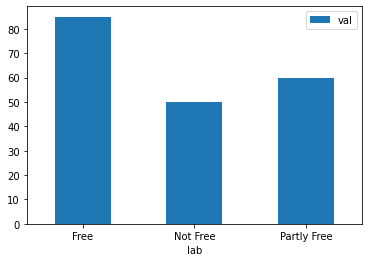

In [171]:
%matplotlib inline

wgi_new = pd.DataFrame({'lab':['Free', 'Not Free', 'Partly Free'], 'val':[85, 50, 60]})
ax = wgi_new.plot.bar(x='lab', y='val', rot=0)